In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/artbm01/Documents/Python-DataAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DE_US = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()

In [3]:
df_DE_US['job_posted_month_no'] = df_DE_US['job_posted_date'].dt.month

In [4]:
df_DE_US_explode = df_DE_US.explode('job_skills')

In [5]:
df_DE_US_pivot = df_DE_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [6]:
df_DE_US_pivot.loc['Total'] = df_DE_US_pivot.sum()

In [7]:
df_DE_US_pivot = df_DE_US_pivot[df_DE_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [8]:
df_DE_US_pivot.drop('Total', inplace=True)

In [9]:
DA_totals = df_DE_US.groupby('job_posted_month_no').size()

In [10]:
df_DE_US_percent = df_DE_US_pivot.div(DA_totals/100, 0)

In [11]:
#Change month no to month name
df_DE_US_percent.reset_index(inplace=True)
df_DE_US_percent['job_posted_month'] = df_DE_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DE_US_percent = df_DE_US_percent.set_index('job_posted_month')
df_DE_US_percent = df_DE_US_percent.drop(columns = 'job_posted_month_no')
df_DE_US_percent

job_skills,sql,python,aws,azure,spark,java,snowflake,hadoop,kafka,scala,...,kali,powerbi,mlpack,qt,fastify,workfront,wrike,xamarin,sqlserver,svelte
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,68.775895,65.725047,42.146893,31.676083,34.500942,26.177024,22.297552,19.397363,20.602637,19.472693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Feb,68.921569,66.764706,46.241830,31.535948,34.738562,27.091503,24.934641,21.078431,21.143791,19.509804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Mar,69.242853,66.792334,46.245680,32.139491,32.610745,24.850770,22.117499,20.106817,19.007226,18.441722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Apr,68.332738,66.690468,43.627276,33.452338,31.345948,24.348447,24.134238,17.779365,18.350589,19.064620,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
May,69.791667,67.977151,42.069892,33.266129,31.989247,24.529570,22.883065,17.775538,16.498656,17.103495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033602,0.00000,0.00000
Jun,70.791566,65.053578,43.553405,32.734186,33.010716,23.712409,23.090218,17.836156,17.110266,15.865883,...,0.069132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Jul,69.610895,65.719844,45.369650,30.894942,31.945525,23.929961,24.280156,18.793774,17.431907,17.937743,...,0.000000,0.000000,0.000000,0.038911,0.000000,0.038911,0.000000,0.000000,0.00000,0.00000
Aug,68.706026,65.922300,42.459468,30.682166,30.773937,23.065158,22.912206,18.170694,17.283573,17.038850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03059,0.03059
Sep,64.826303,59.987593,39.299007,29.776675,29.187345,20.812655,21.712159,14.857320,15.508685,14.981390,...,0.000000,0.031017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


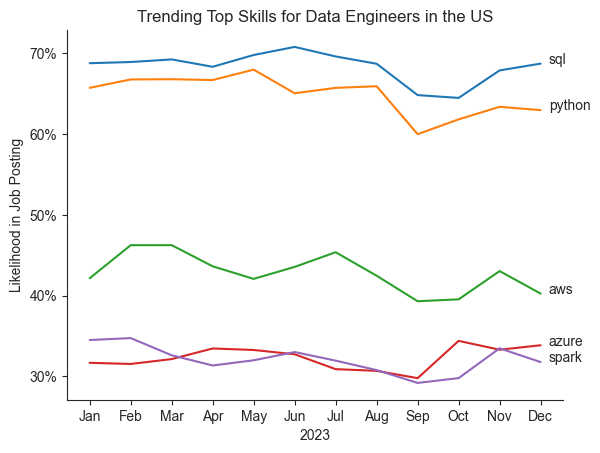

In [ ]:
df_plot = df_DE_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_style('ticks')
sns.despine()

plt.title('Trending Top Skills for Data Engineers in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
#offsets = [0, 0, 1.2, -1.5, 0]
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()